# Data visualisation with Python

Four major plotting libraries (that I know of!)

### The big two:

* Matplotlib
* Seaborn

### Interactive plotting

* Matplotlib - interactive mode
* Plotly

### Graphical user interfaces
* PyQtGraph

# Matplotlib

Effectively Python's default graph library

Heavily influenced/inspired by Matlab

Primarily intended for static images

Conventionally aliased as `plt`

A convenient library for generating ad-hoc plots when you need to picture something quickly

In [2]:
import json
import time
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec


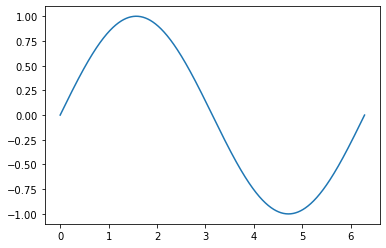

In [2]:
%matplotlib inline
x = np.linspace(0, 2*np.pi, 1000)
y = np.sin(x)

plt.plot(x, y)

`pyplot` is a "convenience" wrapper around Matplotlib. It hides most of the complexity, and so is best suited when you just need something quick and dirty. It provides a bunch of shortcuts to process data for you


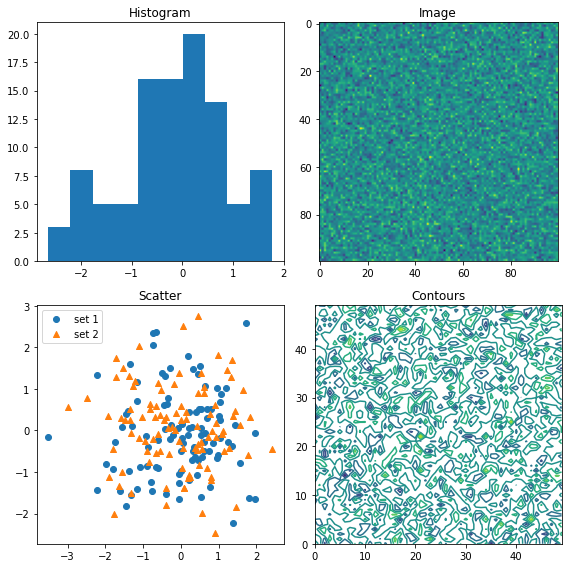

In [3]:
%matplotlib inline
n = 100
data_1d = np.random.normal(size=n)
data_2d = np.random.normal(size=(n, n))

plt.figure(figsize=(8,8))


# Histogram
plt.subplot(221)
plt.hist(data_1d)
plt.title("Histogram")

# # 2D array
# 
plt.subplot(222)
plt.imshow(data_2d)
plt.title("Image")

# # Scatter
plt.subplot(223)
plt.scatter(data_2d[0], data_2d[1], label="set 1")
plt.scatter(data_2d[2], data_2d[3], label="set 2", marker="^")
plt.legend()
plt.title("Scatter")

# Contours
plt.subplot(224)
plt.contour(data_2d[:50, :50])
plt.title("Contours")
plt.tight_layout()

Alternately, Matplotlib exposes a much more thorough API, allowing you access to the various underlying objects

Text(0.5, 1.0, 'Plotting multiple curves')

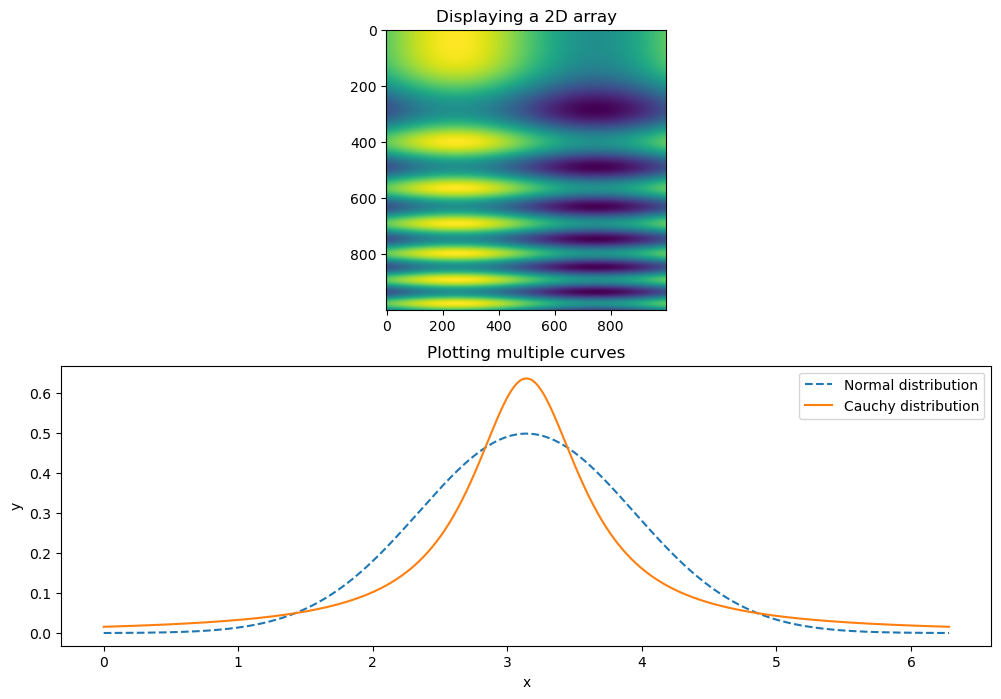

In [4]:
%matplotlib inline
mpl.rcParams.update(mpl.rcParamsDefault)
x = np.linspace(0, 2*np.pi, 1000)

sigma = 0.8
mu = np.pi
gaussian = 1 / (
    sigma * np.sqrt(2*np.pi)
    ) * np.exp(
    -0.5
    * np.power(
        (x - mu) / sigma,
        2
    )
)

gamma = 0.5
centroid = np.pi
lorentzian = 1 / (
    np.pi * gamma
    ) * (
    gamma**2 / (
        np.power(x - centroid, 2)
        + gamma**2
    )
)


X, Y = np.meshgrid(x, x)
image = (
    np.sin(x)
    + np.cos(
        np.power(Y, 2)
    )
)

fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(12,8))
ax[0].imshow(image)
ax[0].set_title("Displaying a 2D array")

ax[1].plot(x, gaussian, label="Normal distribution", linestyle="--")
ax[1].plot(x, lorentzian, label="Cauchy distribution")
ax[1].legend()
ax[1].set_xlabel("x")
ax[1].set_ylabel("y")
ax[1].set_title("Plotting multiple curves")



This approach is where Matplotlib's strengths are revealed: it's primary purpose is generating publication quality figures.

This is a (partial) recreation of several of the figures I have published in the past. One of the key requirements is to completely match the document style, in order to avoid the amerteurish look so common with Excel-sources figures

Particularly relevant in scientific publishing - matplotlib supports rendering with LaTeX, including arbitrary package selection

Figures from [A coherent microwave infterface for manipulation of single optical photons](http://etheses.dur.ac.uk/12385/) 

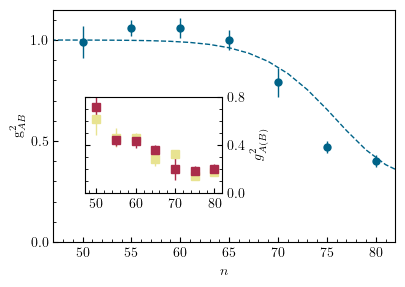

In [5]:
%matplotlib inline
mpl.rcParams.update(mpl.rcParamsDefault)
plt.rcParams['font.family'] = 'serif'
plt.rcParams['axes.formatter.use_mathtext'] = True
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams["ytick.minor.visible"] = True
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams["xtick.minor.visible"] = True
plt.rcParams['text.usetex'] = True


file = r"data/thesis_fig_5-6.json"
with open(file, "r") as f:
    data = json.load(f)

    
fig, ax0 = plt.subplots(1, 1, figsize=(10/2.54, 7/2.54), constrained_layout=True)
ax1 = plt.axes([0.20,0.32,0.35,0.35])

ax0.errorbar(data["main"]["n"], data["main"]["g2"], yerr=data["main"]["err"],
            marker="o", ms=6, linestyle="none", color='#006388', markeredgecolor="none", capsize=0, elinewidth=1)
ax0.plot(data["model"]["n"], data["model"]["g2"],
         linestyle="--", linewidth=1, color='#006388')
ax1.errorbar(data["inset"]["n"], data["inset"]["ab"], yerr=data["inset"]["err_ab"],
             marker="s", ms=6, linestyle="none", color='#E8E391', capsize=0, elinewidth=1)
ax1.errorbar(data["inset"]["n"], data["inset"]["cd"], yerr=data["inset"]["err_cd"],
             marker="s", ms=6, linestyle="none", color='#AA2B4A', capsize=0, elinewidth=1)

ax0.set_xlim(47,82)
ax0.set_xticks(range(50,81, 5))
ax0.set_xlabel("$n$")
ax0.set_ylim([0,1.15])
ax0.set_yticks([0, 0.5, 1.0])
ax0.set_ylabel("g$^2_{AB}$")

ax1.set_xlim(47,82)
ax1.set_xticks(range(50,81,10))
ax1.set_ylim(0, 0.8)
ax1.set_yticks([0, 0.4, 0.8])
ax1.set_ylabel("$g^2_{A(B)}$")
ax1.yaxis.tick_right()
ax1.yaxis.set_label_position("right")
ax1.yaxis.set_ticks_position("both")

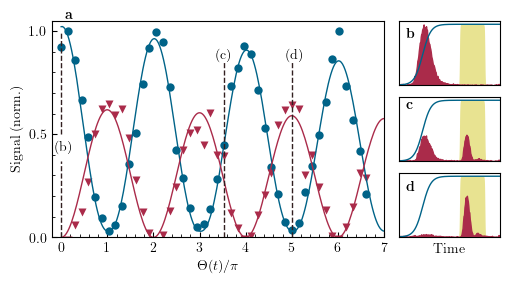

In [6]:
file = r"data/thesis_fig_7-3.json"

with open(file, "r") as f:
    data = json.load(f)
fill = np.zeros_like(data["inset"]["sp"])
fill2 = np.zeros_like(data["inset"]["blue_x"])

fig = plt.figure(figsize=(13/2.54, 7/2.54))
gs = gridspec.GridSpec(3, 4)
ax1 = plt.subplot(gs[:,:-1])
ax2 = plt.subplot(gs[0,-1])
ax3 = plt.subplot(gs[1,-1])
ax4 = plt.subplot(gs[2,-1])

### Main plot
# Actual data
ax1.plot(data["main"]["time"], data["main"]["s"],
         marker="o", ms=6, linestyle="None", color='#006388', markeredgecolor="none")
ax1.plot(data["main"]["time"], data["main"]["p"],
         marker="v", ms=6, linestyle="None", color='#AA2B4A', markeredgecolor="none")

# Models
ax1.plot(data["main"]["model_t"], data["main"]["model_s"],
         ms=0, linestyle="solid", linewidth=1, color='#006388')
ax1.plot(data["main"]["model_t"], data["main"]["model_p"],
         ms=0, linestyle="solid", linewidth=1, color='#AA2B4A')



### Individual times
# Shared background
for ax in (ax2, ax3, ax4):
    ax.fill_between(data["inset"]["blue_x"], data["inset"]["mw_y"], fill2,
                     color='#E8E391', alpha=1)
    ax.plot(data["inset"]["blue_x"], data["inset"]["blue_y"], 
         linestyle="-", lw=1, color='#006388')
# individual-specific
ax2.fill_between(data["inset"]["s_t"], data["inset"]["s"], fill,
                 color='#AA2B4A', alpha=1)
ax3.fill_between(data["inset"]["sp_t"], data["inset"]["sp"], fill,
                 color='#AA2B4A', alpha=1)
ax4.fill_between(data["inset"]["p_t"], data["inset"]["p"], fill,
                 color='#AA2B4A', alpha=1)


#Graph prettifying
ax1.set_xlim(-0.2, 7)
ax1.set_xticks(range(8))
ax1.set_xlabel("$\\Theta(t)/\\pi$")

ax1.set_ylim(-0.0, 1.05)
ax1.set_yticks([0, 0.5, 1.0])
ax1.set_ylabel("Signal (norm.)")


for ax in [ax2, ax3, ax4]:
    ax.set_xlim(2500,3550)
    ax.set_xticks([])
    ax.set_ylim(0,800)
    ax.set_yticks([])
    ax.yaxis.set_label_position("right")
ax4.set_xlabel("Time")


fig.text(0.13,0.965, "\\textbf{a}")
fig.text(0.795,0.9, "\\textbf{b}")
fig.text(0.795,0.64, "\\textbf{c}")
fig.text(0.795,0.34, "\\textbf{d}")

fig.text(0.11,0.485, "(b)")
fig.text(0.425,0.82, "(c)")
fig.text(0.56,0.82, "(d)")
ax1.plot([0,0], [0.5,1], linestyle="--", lw=1, color='#321F20')
ax1.plot([0,0], [0,0.37], linestyle="--", lw=1, color='#321F20')
ax1.plot([5,5], [0,0.85], linestyle="--", lw=1, color='#321F20')
ax1.plot([3.53, 3.53], [0,0.85], linestyle="--", lw=1, color='#321F20')

fig.tight_layout(pad=0.8, w_pad=0.8, h_pad=0.8)

## Interactive Matplotlib

Matplotlib explicitly supports interactive plots. Interactive mode requires an interactive backend, and the Jupyter inline backend does not support it. Here, I'll use the PyQt5 backend

Interactive means that the plot can, in some way, react to the user.

First, an entirely trivial example: changing line colour.

In [3]:
mpl.rcParams.update(mpl.rcParamsDefault)
%matplotlib
plt.ion()
fig, ax = plt.subplots(1, 1)
ax.set_aspect("equal")

Using matplotlib backend: Qt5Agg


In [4]:
ln, = ax.plot(range(5))

In [5]:
ln.set_color("orange")

Now, a rather less trivial example: 3D plotting. Presenting 3D information on a 2D screen is always somewhat problematic, and one of the easiest ways to get around that is to offer an interactive figure that can be rotated or dragged as needed

In [6]:
fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")

x = np.linspace(-5, 5, 25)
X, Y = np.meshgrid(x, x)
Z = np.sin(np.sqrt(np.power(X, 2) + np.power(Y, 2)))
ax.plot_surface(X, Y, Z,
               linewidth=0, antialiased=True)

It can also be used for entirely inappropriate purposes: not wanting to try and figure out the scripting support in Autodesk Inventor, I've used it for scripted 3D modelling in the past

This can only be described as gratuitous abuse of the matplotlib rendering engine - but on the other hand, it worked beautifully, and allowed me to combine both the mechanical and scientific aspects of magnetic field design far faster than the alternatives I reviewed. 

In [11]:
import mfs
file = "data/magnets.yaml"
magnets = mfs.helpers.from_file(file)

ax.clear()
mfs.helpers.plot_magnet_positions(magnets, ax, "xzy")

C:\Users\simoba\AppData\Local\Continuum\anaconda3\envs\dj\lib\site-packages\mfs\helpers.py:550: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  config = lib.load(f, **kwargs)


In another, entirely different meaning of "interactive", it can be used to create plots in real time - e.g. as part of a graphical user interface, or as an instrument takes data. It's not one of Matplotlibs strengths, though, and it's not well suited to use on the web (hence the lack of interactivity in the backend)

0.05013205880000005


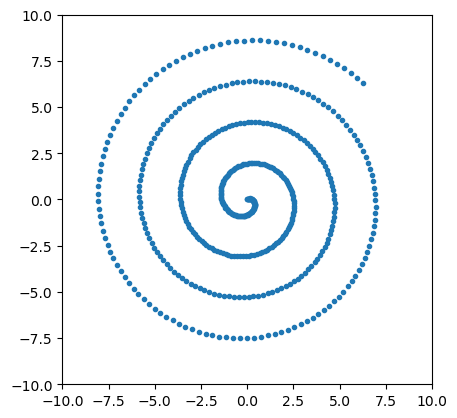

In [12]:
fig, ax = plt.subplots(1, 1)
ax.set_aspect("equal")
ax.set_xlim(-10, 10)
ax.set_ylim(-10, 10)
angles = np.linspace(0, 8*np.pi, 500)
t = np.zeros_like(angles)
for i, angle in enumerate(angles):
    t0 = time.perf_counter()
    x = angle/4 * (np.sin(angle) + np.cos(angle))
    y = angle/4 * (-np.sin(angle) + np.cos(angle))
    plt.plot(x,y,"C0.")
    plt.pause(0.01)
    t1 = time.perf_counter()
    t[i] = t1-t0
print(np.mean(t))
    

This flags up one of Matplotlib's weaknesses. It's _slow_.

For its intended purpose - i.e. high quality, publishable figures - it's not a problem - when I spend weeks or months writing a paper, spending an extra second to render each figure is not worth worrying about. 

But for, e.g., GUI applications, where the user expects a refresh ratio of 30, 60, or 90fps, it's ... not acceptable

# Seaborn

Seaborn is important to mention here, although I have almost never used it - I wasn't aware of it during my PhD, and haven't needed to use its remarkable flexibility since. 

Seaborn is, essentially, a rewrite of the Matplotlib user interface, aiming to evolve beyond the Matlab roots that matplotlib is designed around. However, it uses Matplotlib as the underlying toolkit, and so the two can be used cooperatively in the same project.

# Plotly

Plotly is the go-to library for dynamic plots on the web - it's a Python interface for generating HTML and Javascript that can be rendered by a modern web browser - and in fact, it mostly works through D3, the library discussed last time. 

Jupyter needs some extensions to run the resulting javascript from Plotly:
* install [node.js](https://nodejs.org/en/)
* install the plotly widget
    - `jupyter labextension install jupyterlab-plotly`
    - `jupyter labextension install plotlywidget `
    
Like Matplotlib, Plotly provides a high-level shortcut interface (`plotly.express`), as well as more details control over the exact objects

As I have nearly no experience with Plotly, I will confine this demo to the express. 

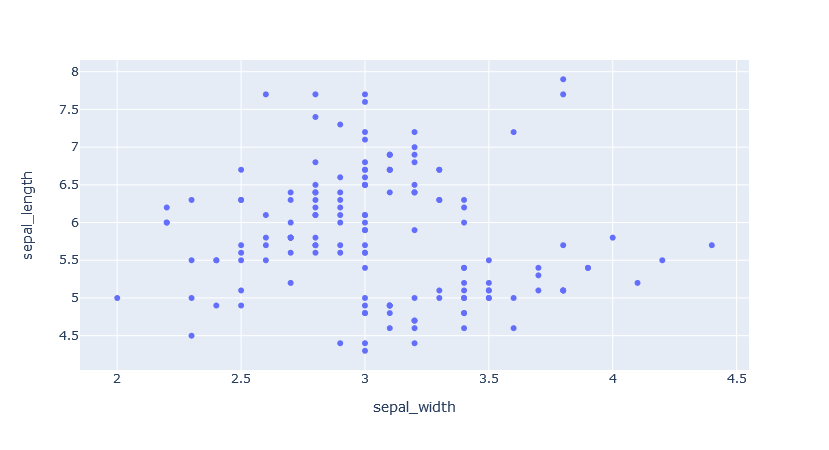

In [13]:
import plotly
import plotly.graph_objects as go
import plotly.express as px
import pandas as pd

df = px.data.iris() # iris is a pandas DataFrame
fig = px.scatter(df, x="sepal_width", y="sepal_length")
fig.show()

In [ ]:
x = np.linspace(0, 2*np.pi, 1000)

X, Y = np.meshgrid(x, x)
image = (
    np.sin(x)
    + np.cos(
        np.power(Y, 2)
    )
)
fig = px.imshow(image, color_continuous_scale="gray")
fig.update_xaxes(showticklabels=False)
fig.update_yaxes(showticklabels=False)
fig.show()

Plotly also supports a bbunch of more advanced and useful tools that you have to write manually to use in Matplotlib. For example, plotting and exposing a statistical regression of data:

In [ ]:
df = px.data.tips()
fig = px.scatter(df, x="total_bill", y="tip", facet_col="smoker", color="sex", trendline="ols")
fig.show()

results = px.get_trendline_results(fig)
print(results)

results.query("sex == 'Male' and smoker == 'Yes'").px_fit_results.iloc[0].summary()

### Exporting to web browsers

Plotly supports various ways of providing graphs to users
* Inline in Jupyter notebooks, as here
* Exported as static image (png, svg, pdf, etc)
* Exported via Dash
* Exported as a standalone HTML file (large: plotly js library is ~3MiB)


In [ ]:
fig = px.scatter(x=range(10), y=range(10))
fig.write_html("plotly_example.html")

```python
import dash
import dash_core_components as dcc
import dash_html_components as html
import plotly.express as px
import pandas as pd

external_stylesheets = ['https://codepen.io/chriddyp/pen/bWLwgP.css']

app = dash.Dash(__name__, external_stylesheets=external_stylesheets)

# assume you have a "long-form" data frame
# see https://plotly.com/python/px-arguments/ for more options
df = pd.DataFrame({
    "Fruit": ["Apples", "Oranges", "Bananas", "Apples", "Oranges", "Bananas"],
    "Amount": [4, 1, 2, 2, 4, 5],
    "City": ["SF", "SF", "SF", "Montreal", "Montreal", "Montreal"]
})

fig = px.bar(df, x="Fruit", y="Amount", color="City", barmode="group")

app.layout = html.Div(children=[
    html.H1(children='Hello Dash'),

    html.Div(children='''
        Dash: A web application framework for Python.
    '''),

    dcc.Graph(
        id='example-graph',
        figure=fig
    )
])

if __name__ == '__main__':
    app.run_server(debug=True)
```

# PyQtGraph

PyQtGraph is a library built for working with graphs and graphical data in Qt applications. In particular, for responsive user interfaces, it addresses Matplotlib's most major shortcoming: performance. PyQtGraph is explicitly built to support reasonably fast updatin.

While PyQtGraph's documentation leaves quite a bit to be desired, it's example library is first class


In [ ]:
import pyqtgraph.examples as ex
ex.run()